In [1]:
import scIB

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
from os.path import abspath, join
import os
from os import listdir
import scanpy as sc

In [3]:
bydataset = '../../data/integration_march_2021/input/bydataset'

In [4]:
# ad = sc.read_h5ad('../../data/integration_march_2021/input/input_all_cells.h5ad')

In [5]:
os.path.abspath('../../data/figures')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/figures'

In [6]:
import numpy as np

In [7]:
for f in listdir(bydataset):
    umap_path = '../../data/figures/%s_umap.png' % f.replace('.h5ad', '')
    if os.path.exists(umap_path):
        continue
    print(f)
    ad = sc.read_h5ad(join(bydataset, f))
    print(ad.shape)
    
    print('normalization')
    sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e5)
    sc.pp.log1p(ad)

    sc.tl.pca(ad)
    sc.pp.neighbors(ad)
    sc.tl.umap(ad)
    
    ad.obs['scpred_prediction'] = ad.obs['scpred_prediction'] if 'scpred_prediction' in ad.obs else np.nan
    sc.pl.umap(ad, color=['dataset', 'batch', 'scpred_prediction'], show=False)
    plt.savefig(umap_path)
    plt.close()


In [8]:
sc.set_figure_params(facecolor='white')

In [9]:
import matplotlib.pyplot as plt

In [11]:
# p = '../../data/integration_march_2021/input/input_1000_cells.h5ad'

In [10]:
p = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/scIB_output/retinal_all_donor_cell.type/integration/unscaled/hvg/R/harmony.h5ad'

In [12]:
ad = sc.read_h5ad(p)

In [13]:
# sc.pl.pca(ad, color=['dataset', 'batch', 'scpred_prediction'])

In [14]:
# sc.pl.umap(ad_sel, color=['dataset', 'batch'])

In [13]:
ad

AnnData object with n_obs × n_vars = 2159366 × 2000 
    obs: 'RNA_snn_res.0.8', 'batch', 'dataset', 'filename', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'scpred_AC', 'scpred_Astrocyte', 'scpred_BC', 'scpred_Cone', 'scpred_HC', 'scpred_MG', 'scpred_Microglia', 'scpred_RGC', 'scpred_RPE', 'scpred_Rod', 'scpred_max', 'scpred_prediction', 'seurat_clusters', 'size_factors', 'cell.type', 'batch.merged', 'donor', 'ident'
    obsm: 'HARMONY', 'X_emb', 'X_pca'
    layers: 'logcounts'

In [14]:
ad.obs['dataset'].value_counts()

Chen_a     1338319
Chen_b      254881
Chen_c      192326
Roska       158368
Hackney     121778
Sanes        74980
Wong         10707
Scheetz       4459
Hafler        3548
Name: dataset, dtype: int64

In [16]:
ad.obs['batch'].value_counts()

0     248394
35    227481
7     126491
11    126305
30     97844
4      92040
10     81043
1      71576
6      66360
8      65797
31     63772
17     60955
2      59154
3      58966
5      56964
13     50683
9      49271
26     46970
16     44424
20     42206
12     38319
36     36774
21     35129
15     33771
19     29980
14     29083
38     24536
28     24382
27     21693
29     18088
18     17590
22     17003
23     15290
24     13372
33     13321
37     12448
32     12095
25     11725
39     10702
34      7369
Name: batch, dtype: int64

In [17]:
for k in ad.obs:
    print(k, len(set(ad.obs[k])))

RNA_snn_res.0.8 75
batch 40
dataset 9
filename 142
nCount_RNA 12455
nFeature_RNA 1563
orig.ident 2
scpred_AC 2159283
scpred_Astrocyte 2159313
scpred_BC 2159365
scpred_Cone 2159363
scpred_HC 2159359
scpred_MG 2159363
scpred_Microglia 2159361
scpred_RGC 2159364
scpred_RPE 2159357
scpred_Rod 2159357
scpred_max 2159297
scpred_prediction 11
seurat_clusters 75
size_factors 2159365
cell.type 11
batch.merged 142
donor 50
ident 50


In [18]:

import pandas as pd

In [21]:
sc.pl.umap(ad, color='donor')

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['HARMONY', 'X_emb', 'X_pca']."

In [63]:
# print(ad.obs['donor'].value_counts().shape, ad.obs['batch'].value_counts().shape)
ad.obs['donor.n.batch'] = (ad.obs['donor'].astype(str) + ':' + ad.obs['batch'].astype(str))

In [65]:
res_all = []
for k in ['donor', 'batch', 'dataset', 'batch.merged', 'cell.type']:
    print(k)
    res_all.append([k, len(set(ad.obs[k])), scIB.me.pcr(ad, k)])
df = pd.DataFrame(res_all, columns=['k', 'n.labels', 'PCR'])

donor
batch
dataset
batch.merged
cell.type


In [66]:
df.sort_values('n.labels')

,k,n.labels,PCR
2,dataset,9,0.139663
4,cell.type,11,0.181280
1,batch,40,0.051304
0,donor,50,0.147762
3,batch.merged,142,0.219455


In [67]:
df['dataset'] = 'all'

In [68]:
for dataset in set(ad.obs['dataset']):
    print(dataset)
    ad_sel = ad[ad.obs['dataset'] == dataset,:]
    print(len(ad_sel.obs['batch.merged'].value_counts()), len(ad_sel.obs['batch'].value_counts()))

Hafler
6 6
Chen_b
15 15
Chen_a


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


40 40
Wong
5 5
Chen_c
20 20
Hackney
11 11
Roska
21 21
Sanes
18 18
Scheetz
6 6


In [69]:
df_all = []
for dataset in set(ad.obs['dataset']):
    print(dataset)
    ad_sel = ad[ad.obs['dataset'] == dataset,:]
    print(ad_sel.shape)
    df2 = pd.DataFrame([[k, len(set(ad_sel.obs[k])), scIB.me.pcr(ad_sel, k)]
                        for k in ['donor', 'batch', 'dataset', 'batch.merged', 'donor.n.batch', 'cell.type']], columns=['k', 'n.labels', 'PCR'])
    df2['dataset'] = dataset
    df_all.append(df2)

Hafler
(3548, 2000)
Chen_b
(254881, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Chen_a


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(1338319, 2000)
Wong


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(10707, 2000)
Chen_c
(192326, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Hackney
(121778, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Roska
(158368, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Sanes
(74980, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Scheetz
(4459, 2000)


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [70]:
# res = pd.concat(df_all)
res = pd.concat([df, pd.concat(df_all)])

In [71]:
# remove this label (mistake and it has to be checked)
res = res[~res['k'].str.contains('sample.40')]

In [72]:
import seaborn as sns
from matplotlib import rcParams

In [73]:
rcParams['figure.figsize'] = 10, 5

In [74]:
len(set(ad.obs['batch'])), len(set(ad.obs['batch.merged'])), len(set(ad.obs['donor']))

(40, 142, 50)

In [75]:
# resb
d = {'batch': 'sample.40', 'batch.merged': 'sample.142', 'dataset': 'dataset.9'}
res['k'] = np.where(~pd.isnull(res['k'].map(d)), res['k'].map(d), res['k'])
hm = res.pivot('dataset', 'k', 'n.labels').T
order = hm.columns
hm

dataset,Chen_a,Chen_b,Chen_c,Hackney,Hafler,Roska,Sanes,Scheetz,Wong,all
k,,,,,,,,,,
cell.type,11.0,11.0,11.0,11.0,10.0,11.0,11.0,11.0,11.0,11.0
dataset.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
donor,20.0,6.0,20.0,4.0,3.0,4.0,7.0,3.0,3.0,50.0
donor.n.batch,40.0,15.0,20.0,11.0,6.0,21.0,18.0,6.0,5.0,NaN
sample.142,40.0,15.0,20.0,11.0,6.0,21.0,18.0,6.0,5.0,142.0
sample.40,40.0,15.0,20.0,11.0,6.0,21.0,18.0,6.0,5.0,40.0


In [76]:
order = res[res['k'] == 'donor'].sort_values('PCR').dataset.values
hm[order]

dataset,Wong,Hackney,Roska,Hafler,Chen_b,Scheetz,Chen_c,Sanes,Chen_a,all
k,,,,,,,,,,
cell.type,11.0,11.0,11.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0
dataset.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
donor,3.0,4.0,4.0,3.0,6.0,3.0,20.0,7.0,20.0,50.0
donor.n.batch,5.0,11.0,21.0,6.0,15.0,6.0,20.0,18.0,40.0,NaN
sample.142,5.0,11.0,21.0,6.0,15.0,6.0,20.0,18.0,40.0,142.0
sample.40,5.0,11.0,21.0,6.0,15.0,6.0,20.0,18.0,40.0,40.0


In [77]:
order

array(['Wong', 'Hackney', 'Roska', 'Hafler', 'Chen_b', 'Scheetz',
       'Chen_c', 'Sanes', 'Chen_a', 'all'], dtype=object)

In [78]:
res

,k,n.labels,PCR,dataset
0,donor,50,1.477621e-01,all
1,sample.40,40,5.130397e-02,all
2,dataset.9,9,1.396627e-01,all
3,sample.142,142,2.194546e-01,all
4,cell.type,11,1.812796e-01,all
0,donor,3,2.996475e-02,Hafler
1,sample.40,6,5.107870e-02,Hafler
2,dataset.9,1,9.605404e-09,Hafler
3,sample.142,6,5.109609e-02,Hafler
4,donor.n.batch,6,5.119580e-02,Hafler


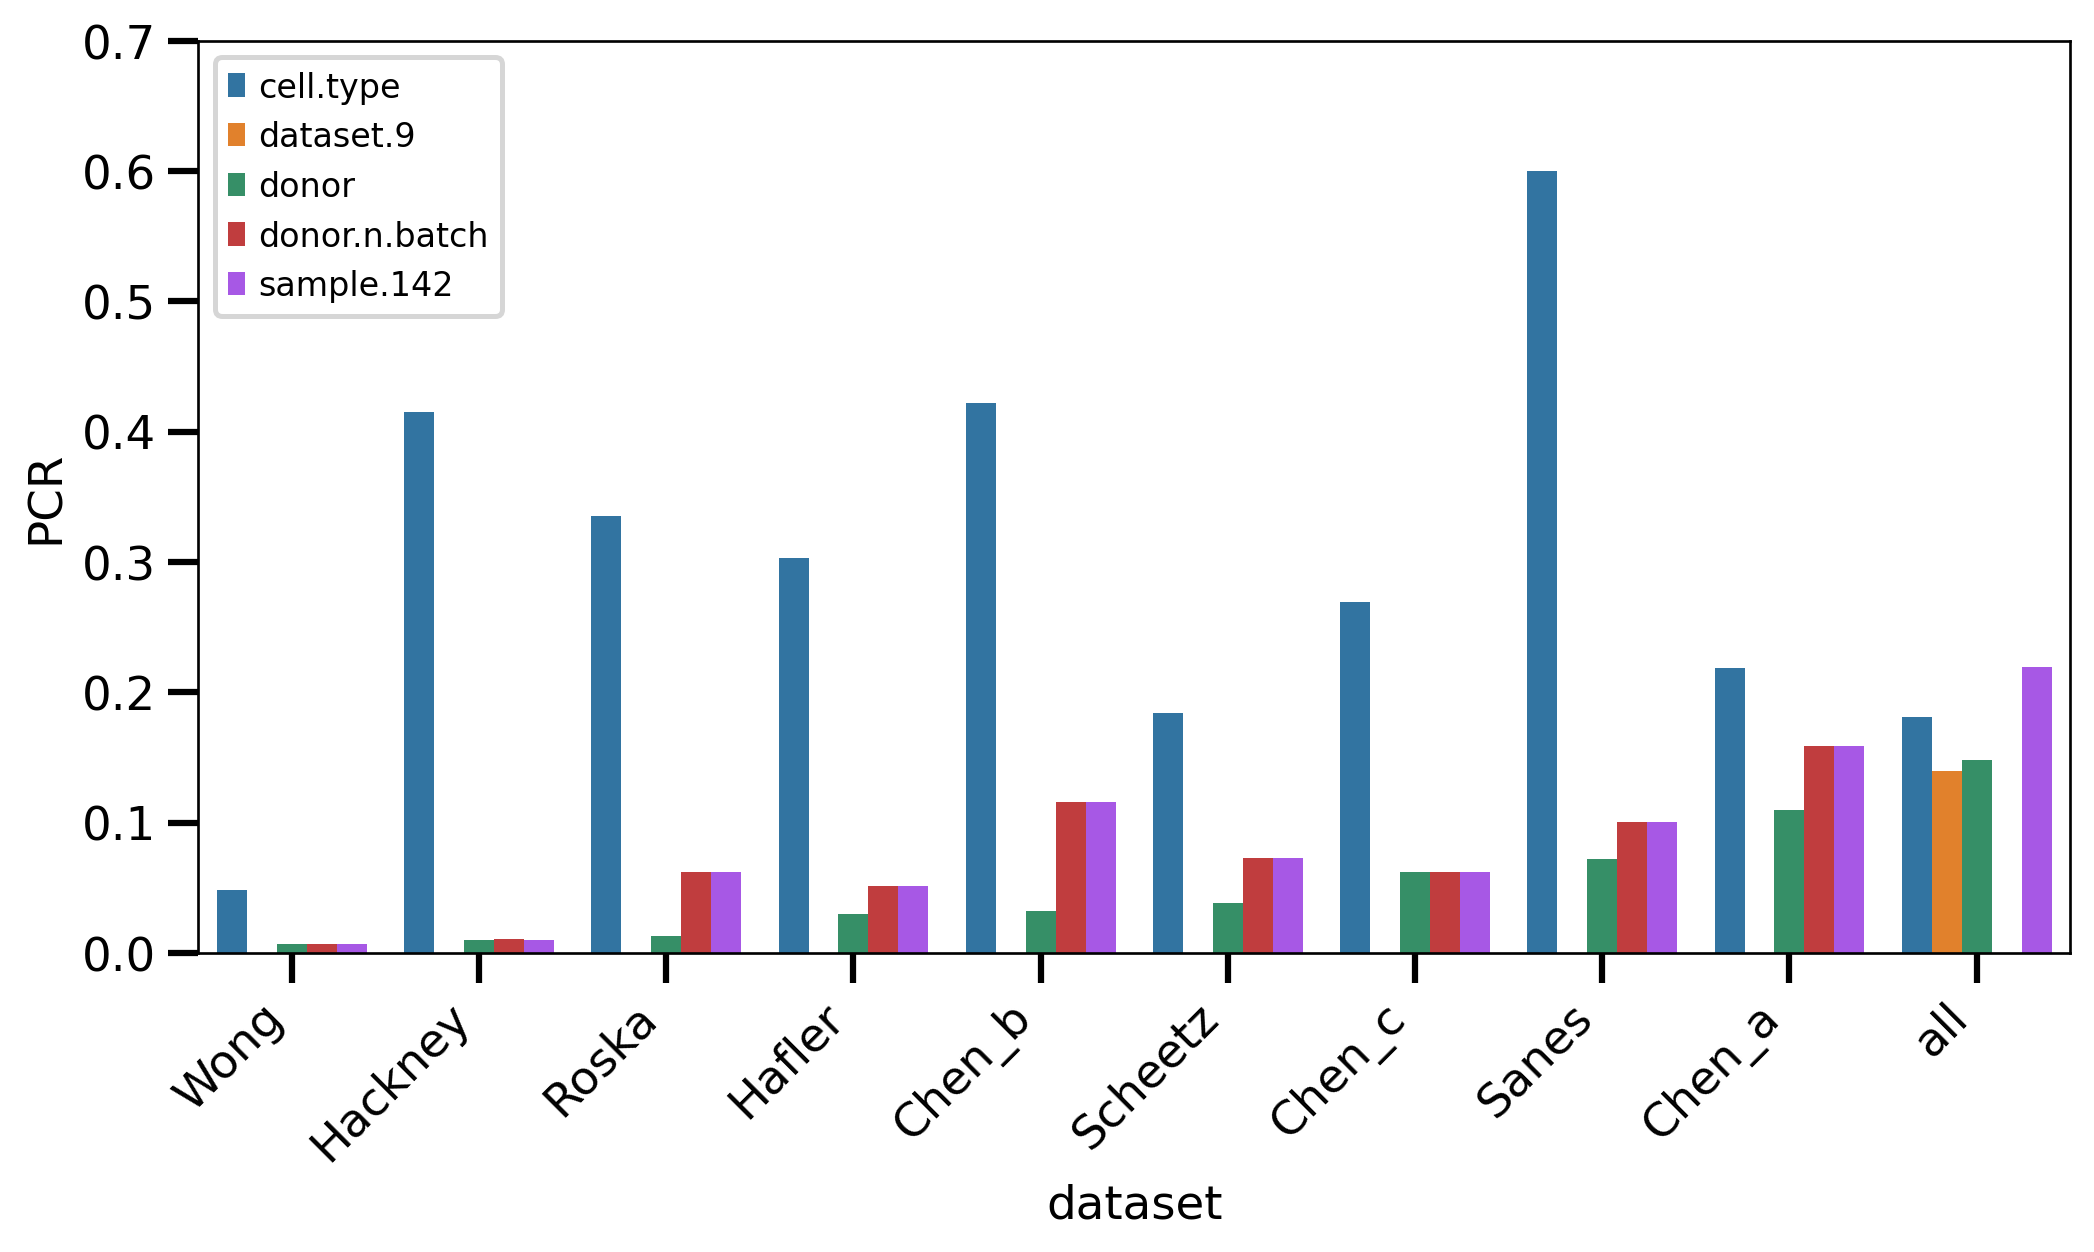

In [89]:
rcParams['figure.dpi'] = 120
sns.barplot(data=res[res['k'] != 'sample.40'], x='dataset', y='PCR', hue='k', zorder=0, order=order,
           hue_order=sorted(list(set(res[res['k'] != 'sample.40']['k']))))

plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=10)
plt.grid(False)
plt.ylim([0, 0.7]);

In [ ]:
splot = sns.barplot(data=res, x='dataset', y='PCR', hue='k', zorder=0)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.grid(False)